In [ ]:
# DATA PREPROCESSING
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv("/content/sample_data/california_housing_train.csv")
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
x1 = data['housing_median_age']
x2 = data['total_rooms']
x3 = data['total_bedrooms']
x4 = data['population']
x5 = data['households']
x6 = data['median_income']
x6 = x6.tolist()

# target
y = data['median_house_value']
y = y.tolist()

In [ ]:
# CLEANING OUTLIER
total = 0

# pada semua data, jika nilai y kurang dari 80000 atau lebih dari 135000, maka ubah data dengan nilai rata-rata 10 data di sekitarnya
for i in range(0, len(y)):
  if y[i] > 499999:
    for j in range(i-10, i+10):
      if j >= len(y)-11:
        break
      total += y[j]
    avg = total/20
    y[i] = avg

# ulangi langkah untuk data ke-0 hingga 200, jika data y kurang dari 95000, beri nilai data tsb dengan rata-rata 10 data di sekitarnya
# for i in range(0, 200):
#   if y[i] < 95000:
#     for j in range(i-5, i+5):
#       if j >= len(y)-6:
#         break
#       total += y[j]
#     avg = total/10
#     y[i] = avg
#
# # ulangi lagi untuk data ke 200 - 400
# for i in range(200, 400):
#   if y[i] < 95000:
#     for j in range(i-5, i+5):
#       if j >= len(y)-6:
#         break
#       total += y[j]
#     avg = total/10
#     y[i] = avg
#
# # ulangi lagi untuk siswa data, jika nilai y kurang dari 100000, maka isi dengan rata-rata 10 data di sekitarnya
# for i in range(400, len(y)):
#   if y[i] < 100000:
#     for j in range(i-5, i+5):
#       if j >= len(y)-6:
#         break
#       total += y[j]
#     avg = total/10
#     y[i] = avg

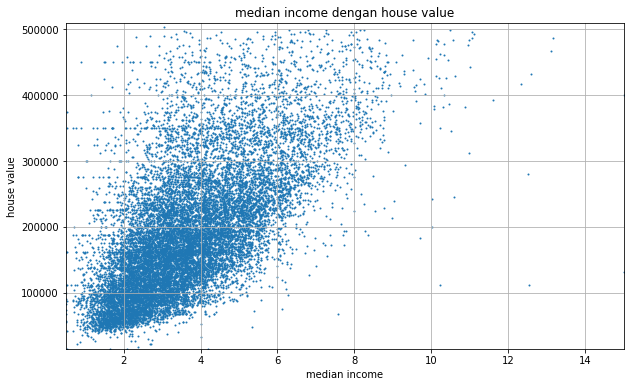

In [ ]:
# hubungan x6 dengan y
plt.figure(figsize=[10, 6])
plt.scatter(x6, y, s = 1)
plt.grid()
plt.ylim(14999.000000, 510001.000000)
plt.xlim(0.499900, 15.000100)
plt.title("median income dengan house value")
plt.xlabel("median income")
plt.ylabel("house value")
plt.show()

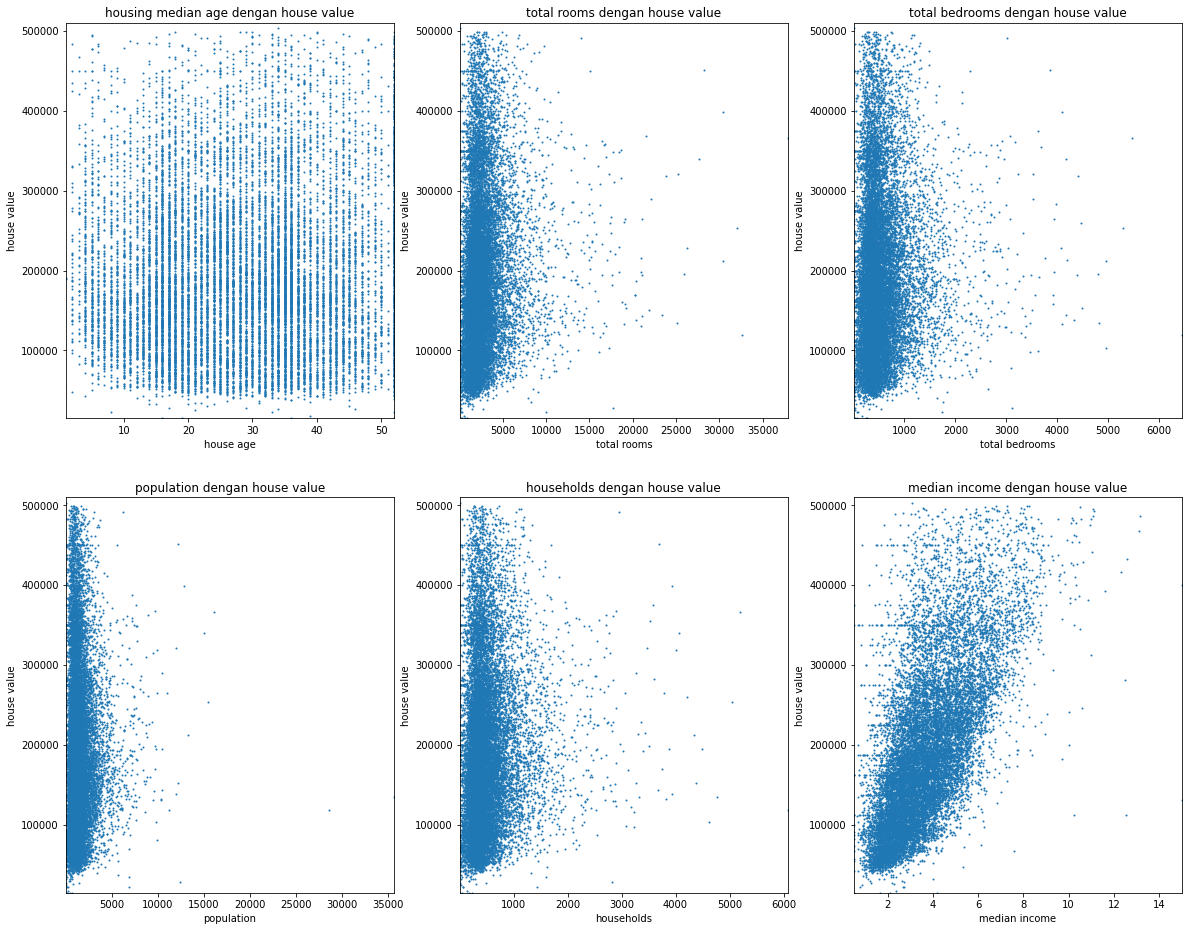

In [ ]:
# EXPLORATORY DATASET ANALYSYS
plt.figure(figsize=[20, 16])
# Graphic Plot
# hubungan x1 dengan y
plt.subplot(2,3,1)
plt.scatter(x1, y, s = 1)
plt.ylim(14999.000000, 510001.000000)
plt.xlim(1.000000, 52.000000)
plt.title("housing median age dengan house value")
plt.ylabel("house value")
plt.xlabel("house age")

# hubungan x2 dengan y
plt.subplot(2,3,2)
plt.scatter(x2, y, s = 1)
plt.ylim(14999.000000, 510001.000000)
plt.xlim(2.000000	, 37937.000000)
plt.title("total rooms dengan house value")
plt.ylabel("house value")
plt.xlabel("total rooms")

# hubungan x3 dengan y
plt.subplot(2,3,3)
plt.scatter(x3, y, s = 1)
plt.ylim(14999.000000, 510001.000000)
plt.xlim(1.000000	, 6445.000000)
plt.title("total bedrooms dengan house value")
plt.ylabel("house value")
plt.xlabel("total bedrooms")

# hubungan x4 dengan y
plt.subplot(2,3,4)
plt.scatter(x4, y,  s = 1)
plt.ylim(14999.000000, 510001.000000)
plt.xlim(3.000000, 35682.000000)
plt.title("population dengan house value")
plt.xlabel("population")
plt.ylabel("house value")

# hubungan x5 dengan y
plt.subplot(2,3,5)
plt.scatter(x5, y,  s = 1)
plt.ylim(14999.000000, 510001.000000)
plt.xlim(1.000000, 6082.000000)
plt.title("households dengan house value")
plt.xlabel("households")
plt.ylabel("house value")

# hubungan x6 dengan y
plt.subplot(2,3,6)
plt.scatter(x6, y, s = 1)
plt.ylim(14999.000000, 510001.000000)
plt.xlim(0.499900, 15.000100)
plt.title("median income dengan house value")
plt.xlabel("median income")
plt.ylabel("house value")


plt.show()

In [ ]:
# PEMODELAN DATA

def gradientdescent(x6, y, w, b, alpha):
  dldw = 0.0
  dldb = 0.0
  N = len(x6)

  for i in range(N):
    dldw += -1*x6[i] * (y[i] - (w*x6[i] + b))
    dldb += -1*(y[i] - (w*x6[i] + b))

    w = w = w - (1/float(N)) * dldw * alpha
    b = b - (1/float(N)) * dldb * alpha
    return w, b

In [ ]:
from decimal import Decimal
def costfucntion(x6, y, w, b):
  N = len(x1)
  totalerror = 0.0
  totalerror = Decimal(totalerror)
  for i in range(N):
    totalerror += Decimal(y[i] - (w*x6[i] - b))**2
  return totalerror / Decimal(2*float(N))

def train(x6, y, w, b, alpha, n_iter):
  for i in range(n_iter):
    w, b = gradientdescent(x6, y, w, b, alpha)

    if i % 10000 == 0:
      print("iteration: ", i, "cost: ", costfucntion(x6, y, w, b))
  return w, b

def predict(X, w, b):
  return X*w + b

In [ ]:
w, b = train(x6, y, 35000, 35000, 0.00000000000001, 10000)
x6_new = 20000
y_new = predict(x6_new, w, b)
print("\n\nUji prediksi dengan satu data\n\nnilai y jika x = 20000", y_new)

x6_test = x6[:1000]
y_test = y[:1000]
y_prediction = list()
n = len(x6_test)
for i in range(n):
  y_new = predict(x6_test[i], w, b)
  y_prediction.append(y_new)

print("\n\nnilai x, nilai test y, nilai prediksi y")
for i in range(n):
  if i % 30 == 0:
    print(x6_test[i],"     ", y_test[i], "     ", y_prediction[i])

iteration:  0 cost:  1.954198865050386575553062949E+67


Uji prediksi dengan satu data

nilai y jika x = 20000 700035000.0


nilai x, nilai test y, nilai prediksi y
1.4936       66900.0       87276.0
1.9939       65800.0       104786.5
1.7159       62200.0       95056.5
1.875       93800.0       100625.0
2.7       58800.0       129500.0
2.5       96300.0       122500.0
3.3333       91800.0       151665.5
7.6281       341700.0       301983.5
2.25       248100.0       113750.0
2.183       113500.0       111405.0
2.7375       90800.0       130812.5
5.0733       196600.0       212565.5
4.5096       159500.0       192836.0
2.4145       137600.0       119507.5
2.0326       123200.0       106141.0
2.2161       76900.0       112563.5
8.093       379600.0       318255.0
4.0357       153800.0       176249.5
7.7684       362300.0       306894.0
2.8281       69300.0       133983.5
6.5151       281700.0       263028.5
5.0829       179400.0       212901.50000000003
3.5192       144000.0       158172

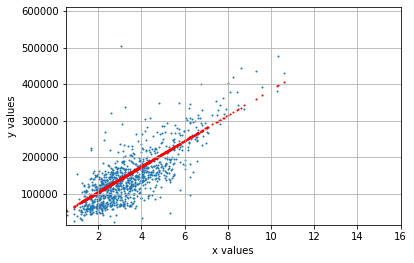

In [ ]:
plt.scatter(x6_test, y_test, s = 1)
plt.scatter(x6_test, y_prediction, c="Red", s = 1, zorder = 1)
plt.grid()
plt.ylim(14999.000000, 610001.000000)
plt.xlim(0.499900, 16.000100)
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

In [ ]:
import math
for i in range(len(y_test)):
  error = (y_test[i] - (y_prediction[i]))

error = error**2
mse = error / len(y_test)
# mse = pd.DataFrame({'y_test': y_test, 'y_prediction': y_prediction})

# mse = (np.square(y_test - y_prediction)).mean(axis=ax)
# print(mse)
print("Mean squared error (MSE): ", mse)
print("Root mean squared error (RMSE) :", math.sqrt(mse))

Mean squared error (MSE):  14204945.04025
Root mean squared error (RMSE) : 3768.944817883382
